## Setup

In [1]:
import matplotlib.pyplot as plt

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

# # Set the font size for the axes labels
# plt.rcParams['axes.labelsize'] = 35

plt.rcParams['font.size']

10.0

## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

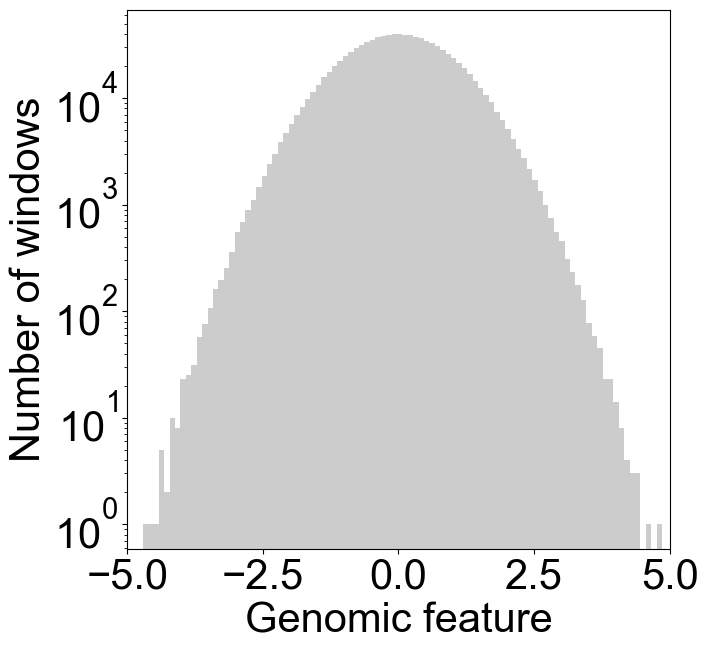

In [2]:
import importlib
import generate_data
importlib.reload(generate_data)
from generate_data import plot_xs 

plt.rcParams.update({'font.size': 30})

NUMBER_EXAMPLES = 1000000 # Number of intervals

def plot_xs_wrapper():
    fig, axes = plt.subplots(1, 1, figsize=(7, 7))
    plot_xs(axes, NUMBER_EXAMPLES, alpha=0.2)
    axes.set_xticks([-5, -2.5, 0, 2.5, 5])
    axes.set_yticks([1e0, 1e1, 1e2, 1e3, 1e4])
    # plot_xs(axes[1], NUMBER_EXAMPLES, xlim=(-2.5, 2.5), yscale='linear')

plot_xs_wrapper()

## True mapping from feature to target (mimicking SNV counts)

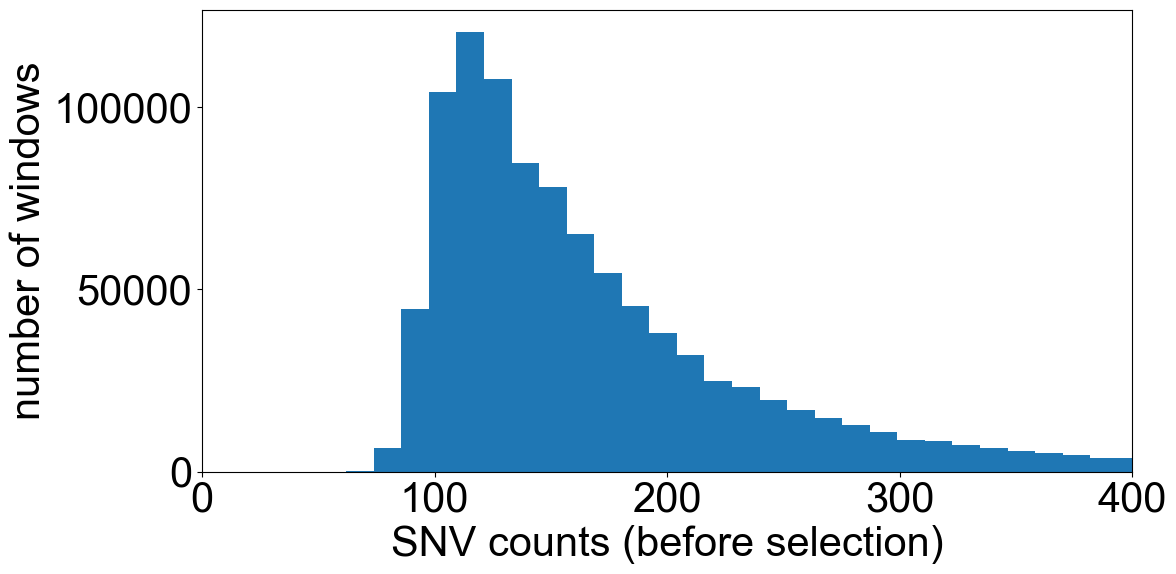

In [3]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.462926,156,True
1,0.711741,178,True
2,0.234493,144,True
3,-2.024653,88,True
4,0.106252,124,True
...,...,...,...
999995,0.321397,172,False
999996,-0.150376,132,False
999997,0.347159,182,False
999998,-0.780649,122,False


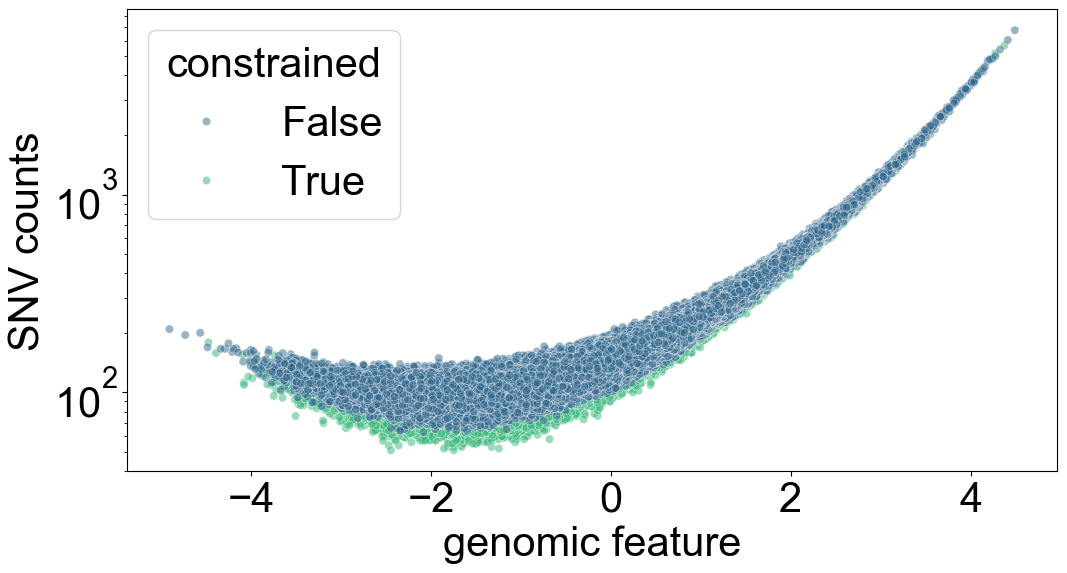

In [4]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

Quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



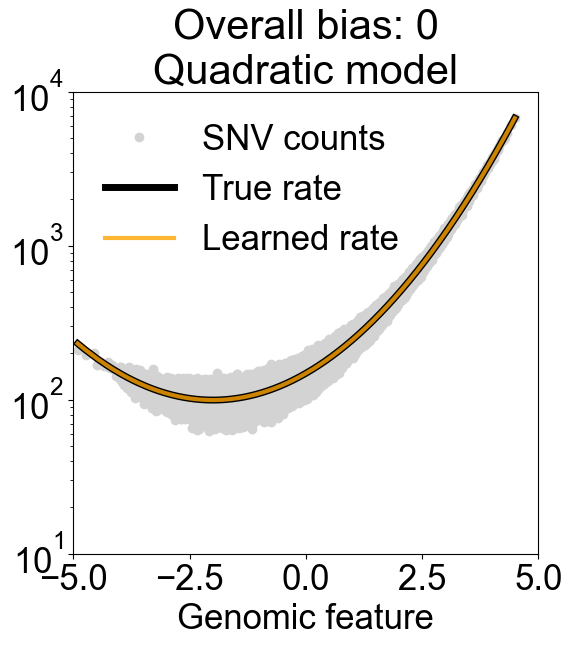

Linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



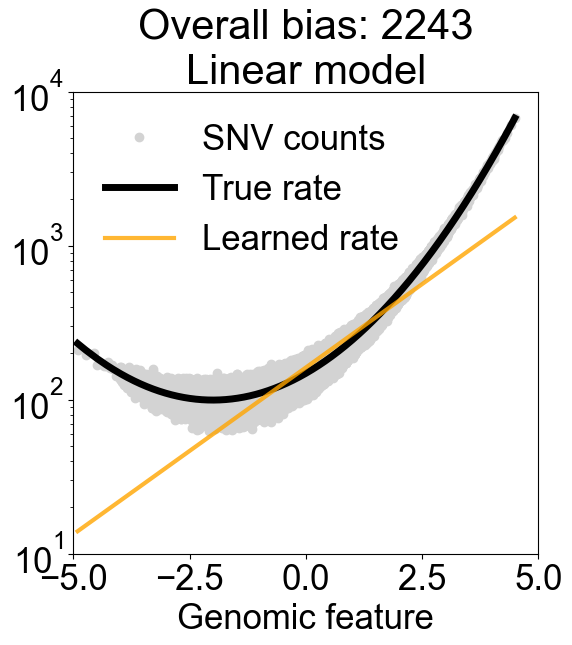

Constant model of lambda:
alpha: 5.21 (A: 5)



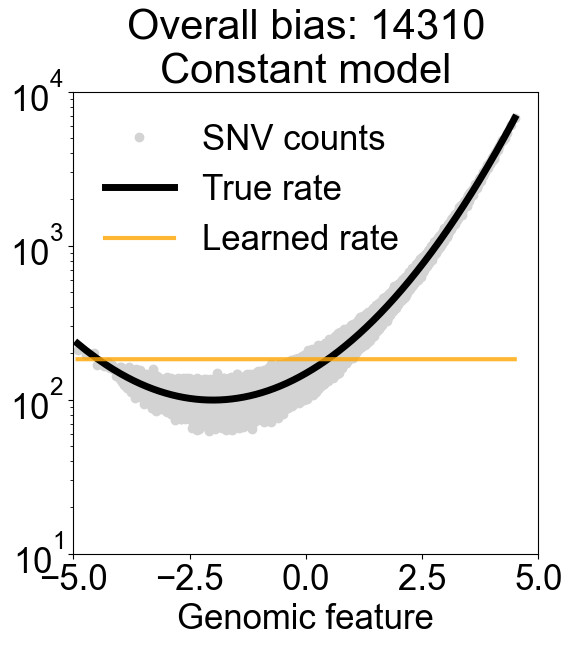

,x,y,constrained,x2,predicted_y_QuadraticModel,residuals_QuadraticModel,standardized_residuals_QuadraticModel,predicted_y_LinearModel,residuals_LinearModel,standardized_residuals_LinearModel,predicted_y_ConstantModel,residuals_ConstantModel,standardized_residuals_ConstantModel
0,0.462926,156,True,0.214300,182.493533,26.493533,1.961174,203.895828,47.895828,3.354235,183.230043,27.230043,2.011639
1,0.711741,178,True,0.506575,207.567951,29.567951,2.052301,230.836835,52.836835,3.477637,183.230043,5.230043,0.386373
2,0.234493,144,True,0.054987,163.926456,19.926456,1.556344,181.939349,37.939349,2.812720,183.230043,39.230043,2.898147
3,-2.024653,88,True,4.099220,99.504482,11.504482,1.153309,58.960883,-29.039117,-3.781825,183.230043,95.230043,7.035187
4,0.106252,124,True,0.011290,155.051212,31.051212,2.493681,170.666316,46.666316,3.572149,183.230043,59.230043,4.375661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.321397,172,False,0.103296,170.546434,-1.453566,-0.111305,189.998964,17.998964,1.305786,183.230043,11.230043,0.829627
999996,-0.150376,132,False,0.022613,140.084146,8.084146,0.683030,150.161513,18.161513,1.482084,183.230043,51.230043,3.784656
999997,0.347159,182,False,0.120519,172.609846,-9.390154,-0.714727,192.456069,10.456069,0.753707,183.230043,1.230043,0.090870
999998,-0.780649,122,False,0.609413,115.448538,-6.551462,-0.609739,109.656071,-12.343929,-1.178792,183.230043,61.230043,4.523413


In [5]:
import importlib
import fit_neutral_models
importlib.reload(fit_neutral_models)
from fit_neutral_models import fit_poisson_model_wrapper

plt.rcParams.update({'font.size': 25})

MODEL_TYPES = ['Quadratic', 'Linear', 'Constant'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


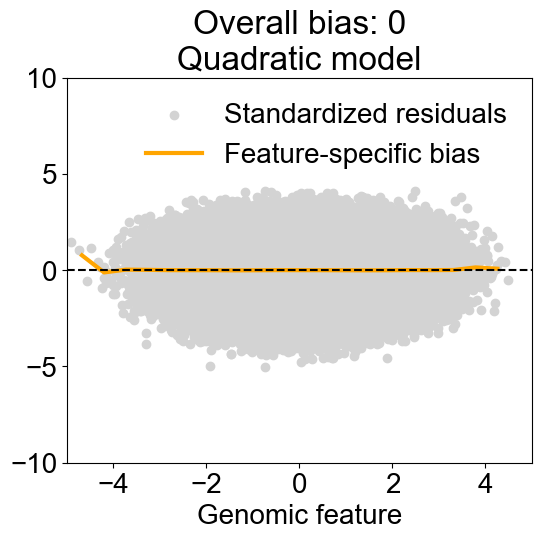

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


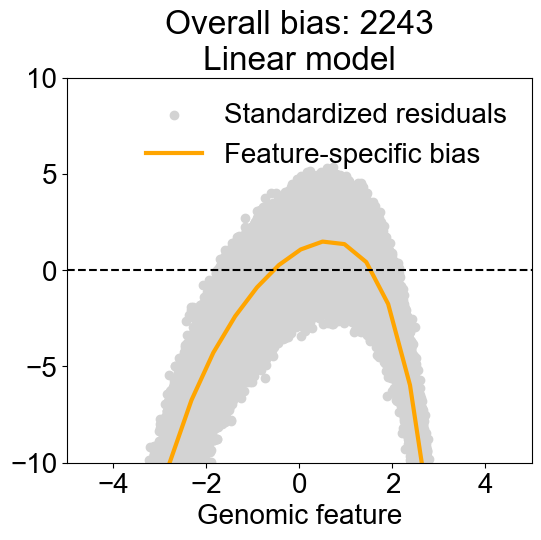

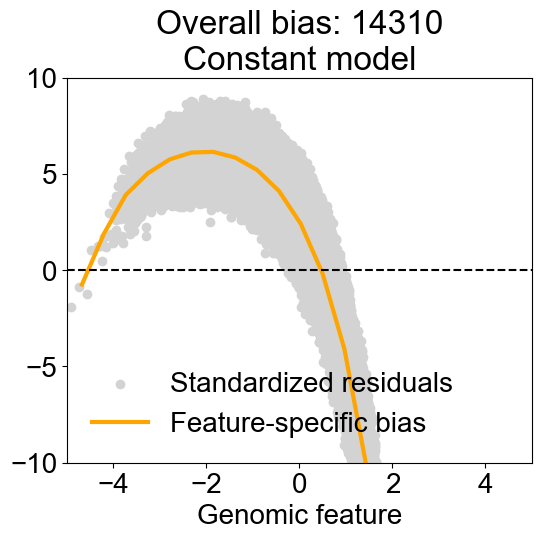

In [6]:
import importlib
import plot_residuals
importlib.reload(plot_residuals)
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 20})

plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES, true_params=TRUE_PARAMS)

## Stratify neutral models' performances by x

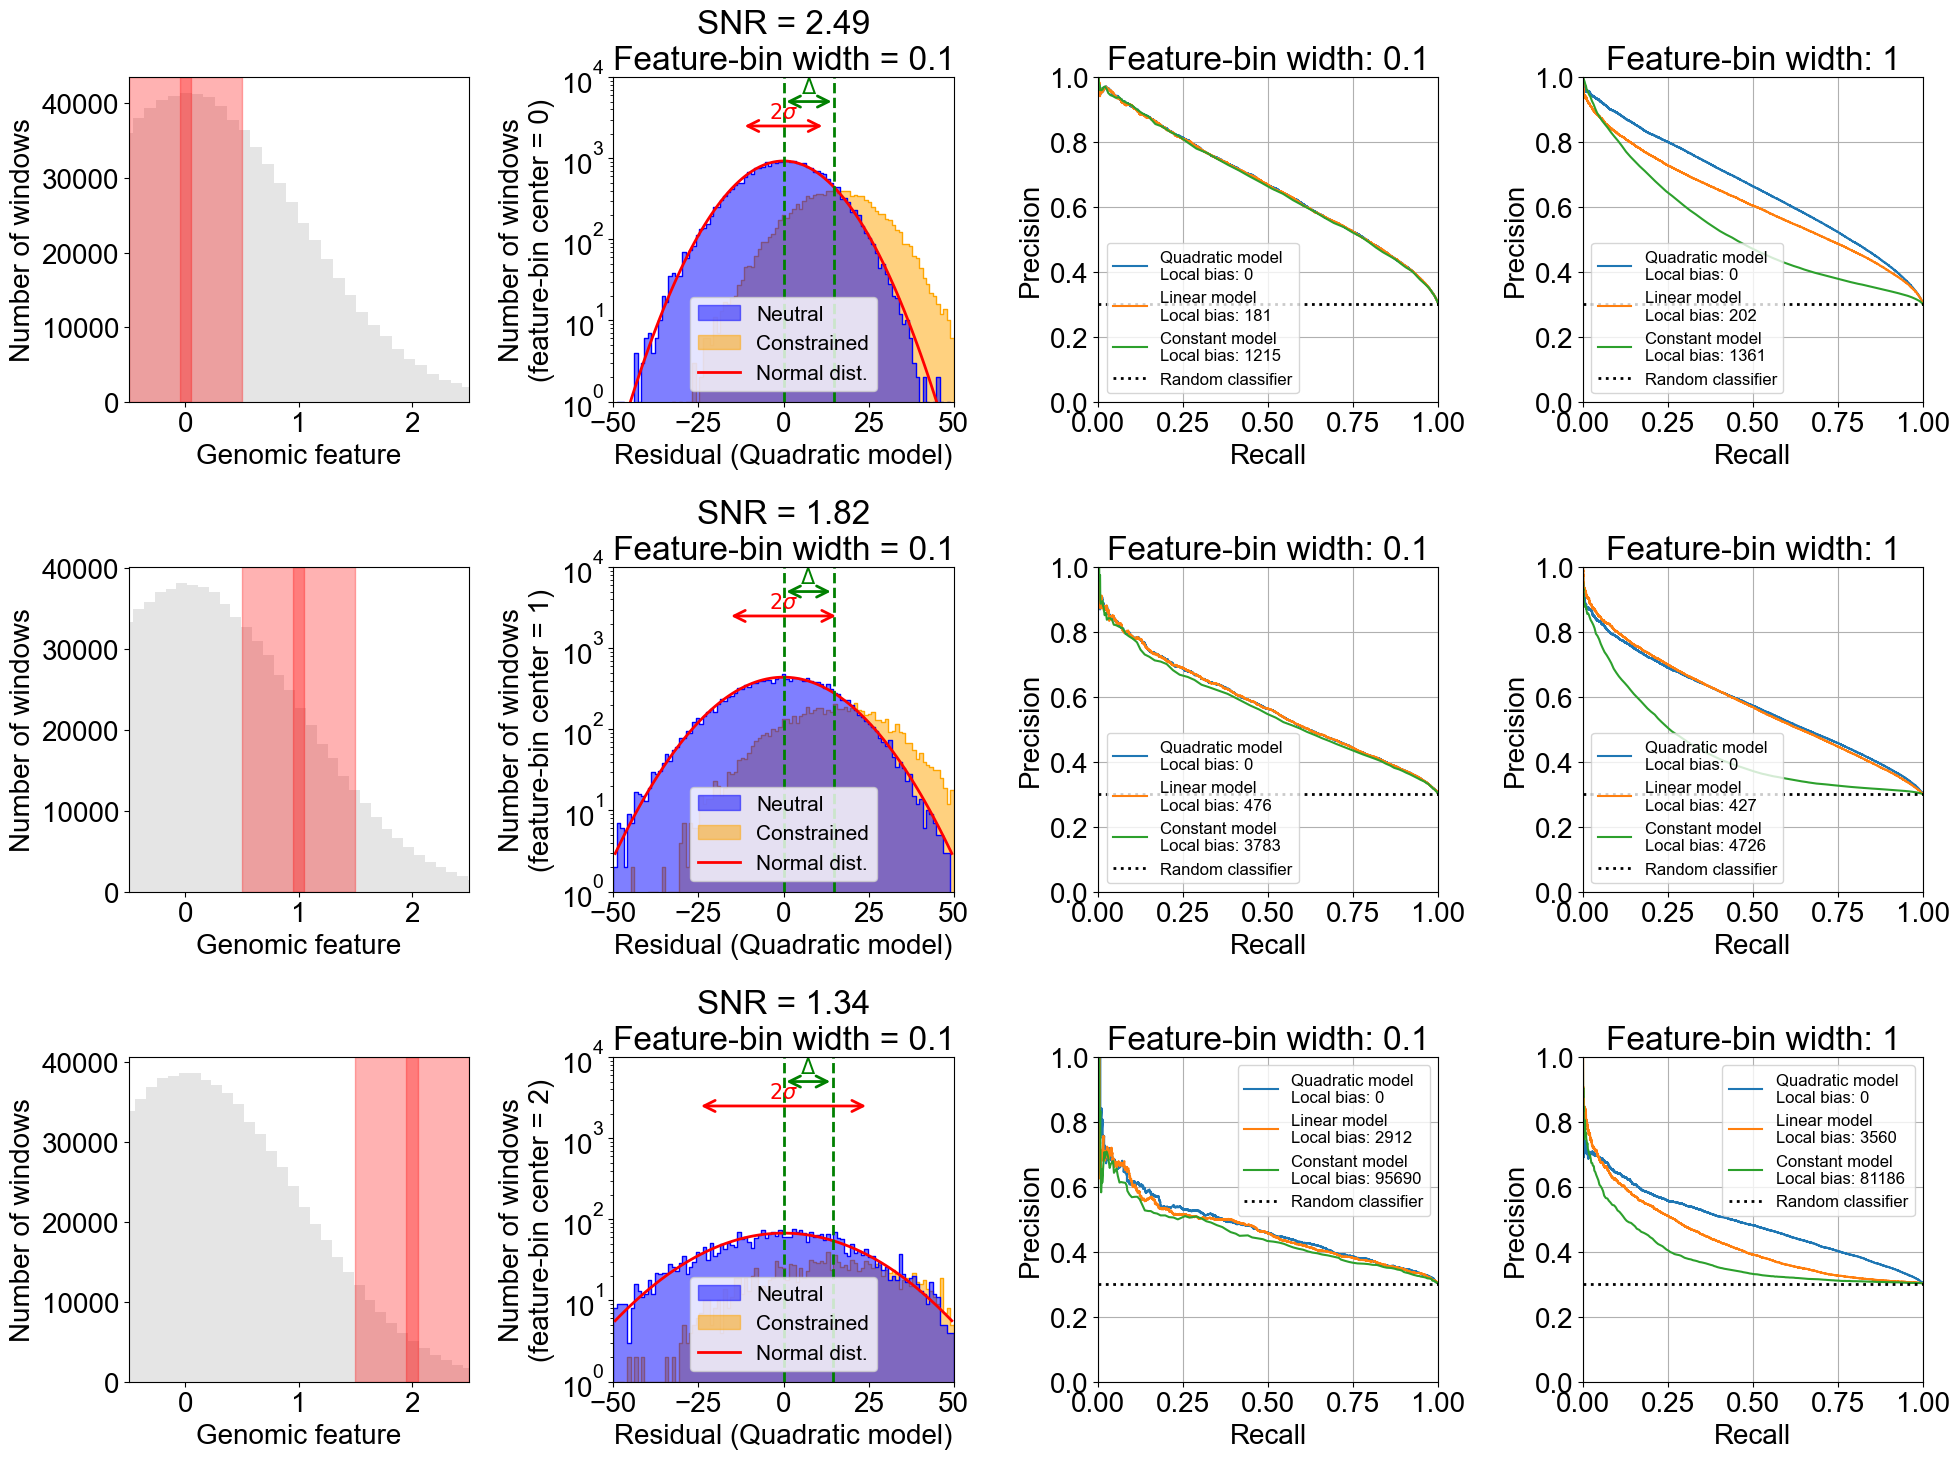

In [18]:
import importlib
import predict_constraint
importlib.reload(predict_constraint)
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

# plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1, 10], true_params=TRUE_PARAMS)
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1], true_params=TRUE_PARAMS)
# plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-5, 5), ylim_residual=(1, 1e4), standardized=True, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1], true_params=TRUE_PARAMS)

In [8]:
# TODO 
# check new func sig for plot_pr_curve_wrapper

## Model bias is responsible for poor genome-wide performance 

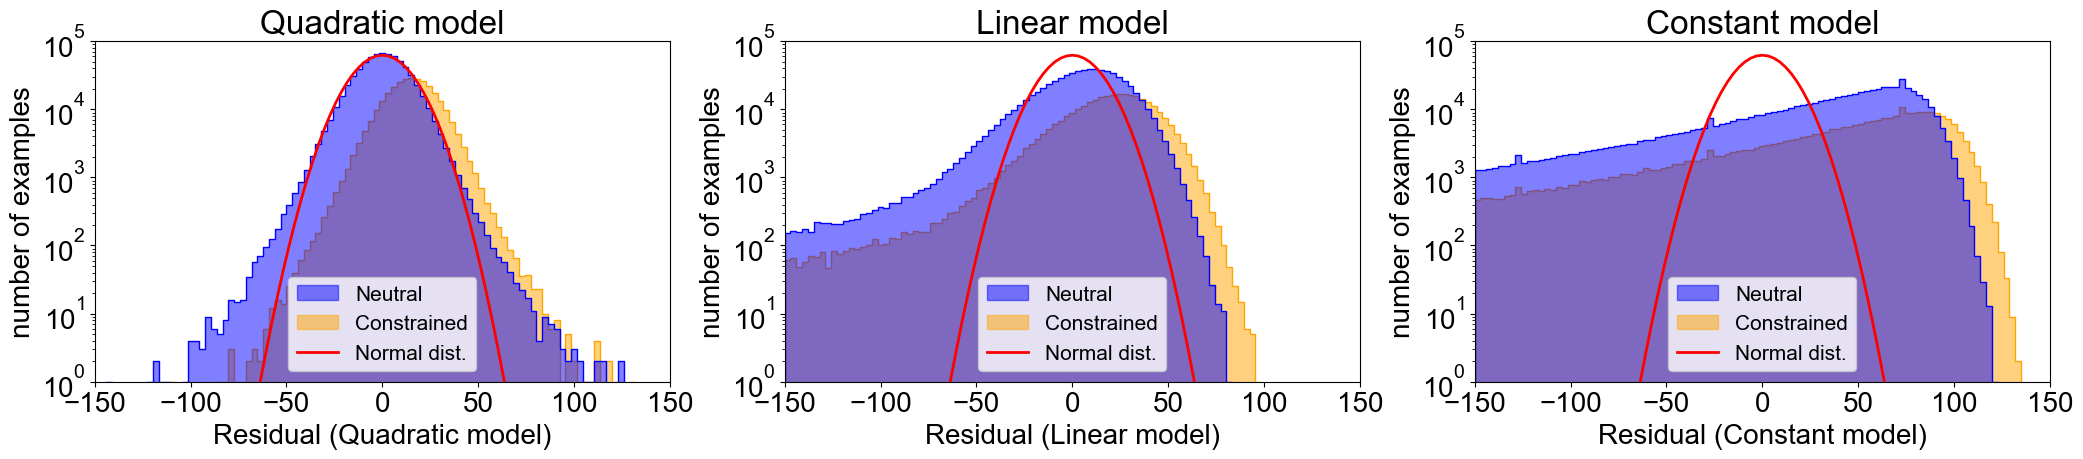

In [9]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

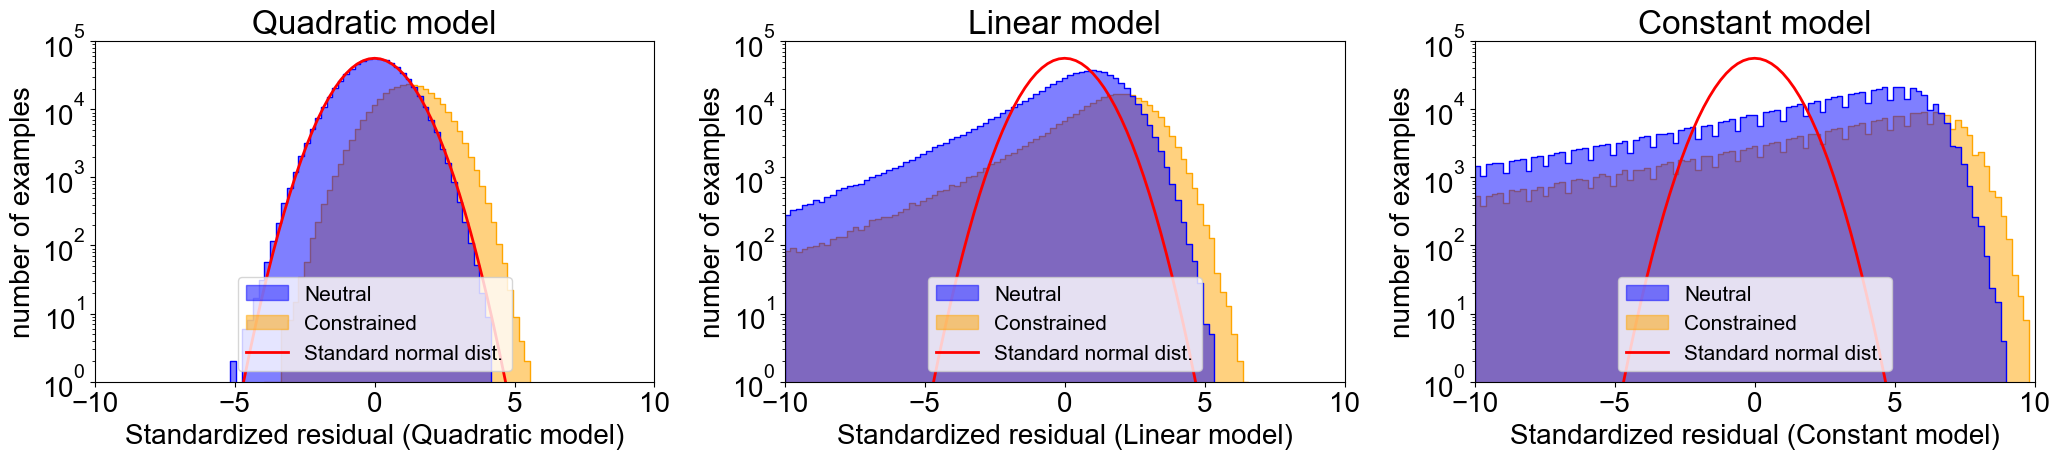

In [10]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


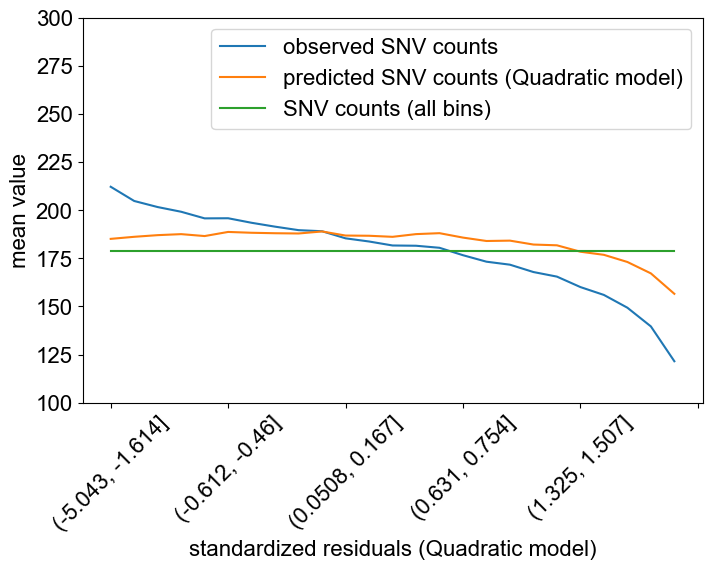

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


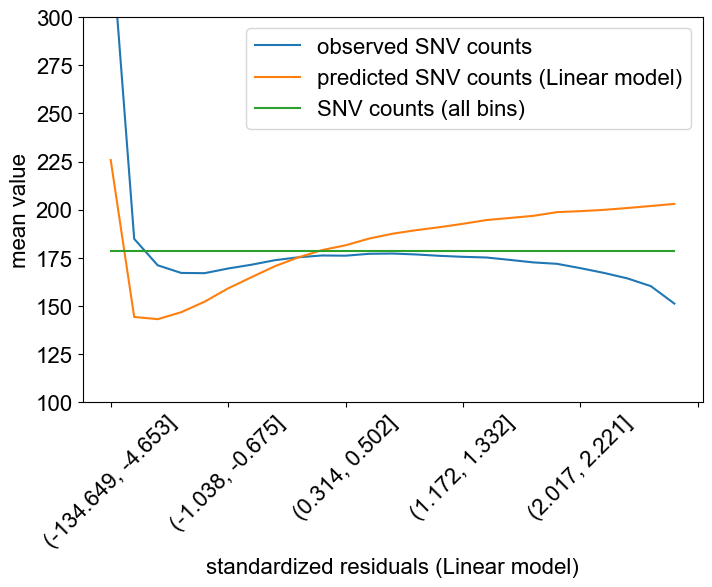

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


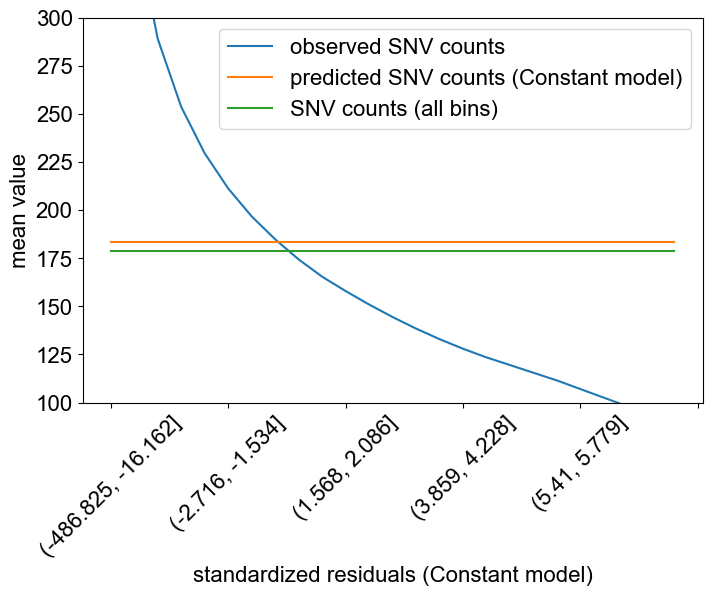

In [11]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

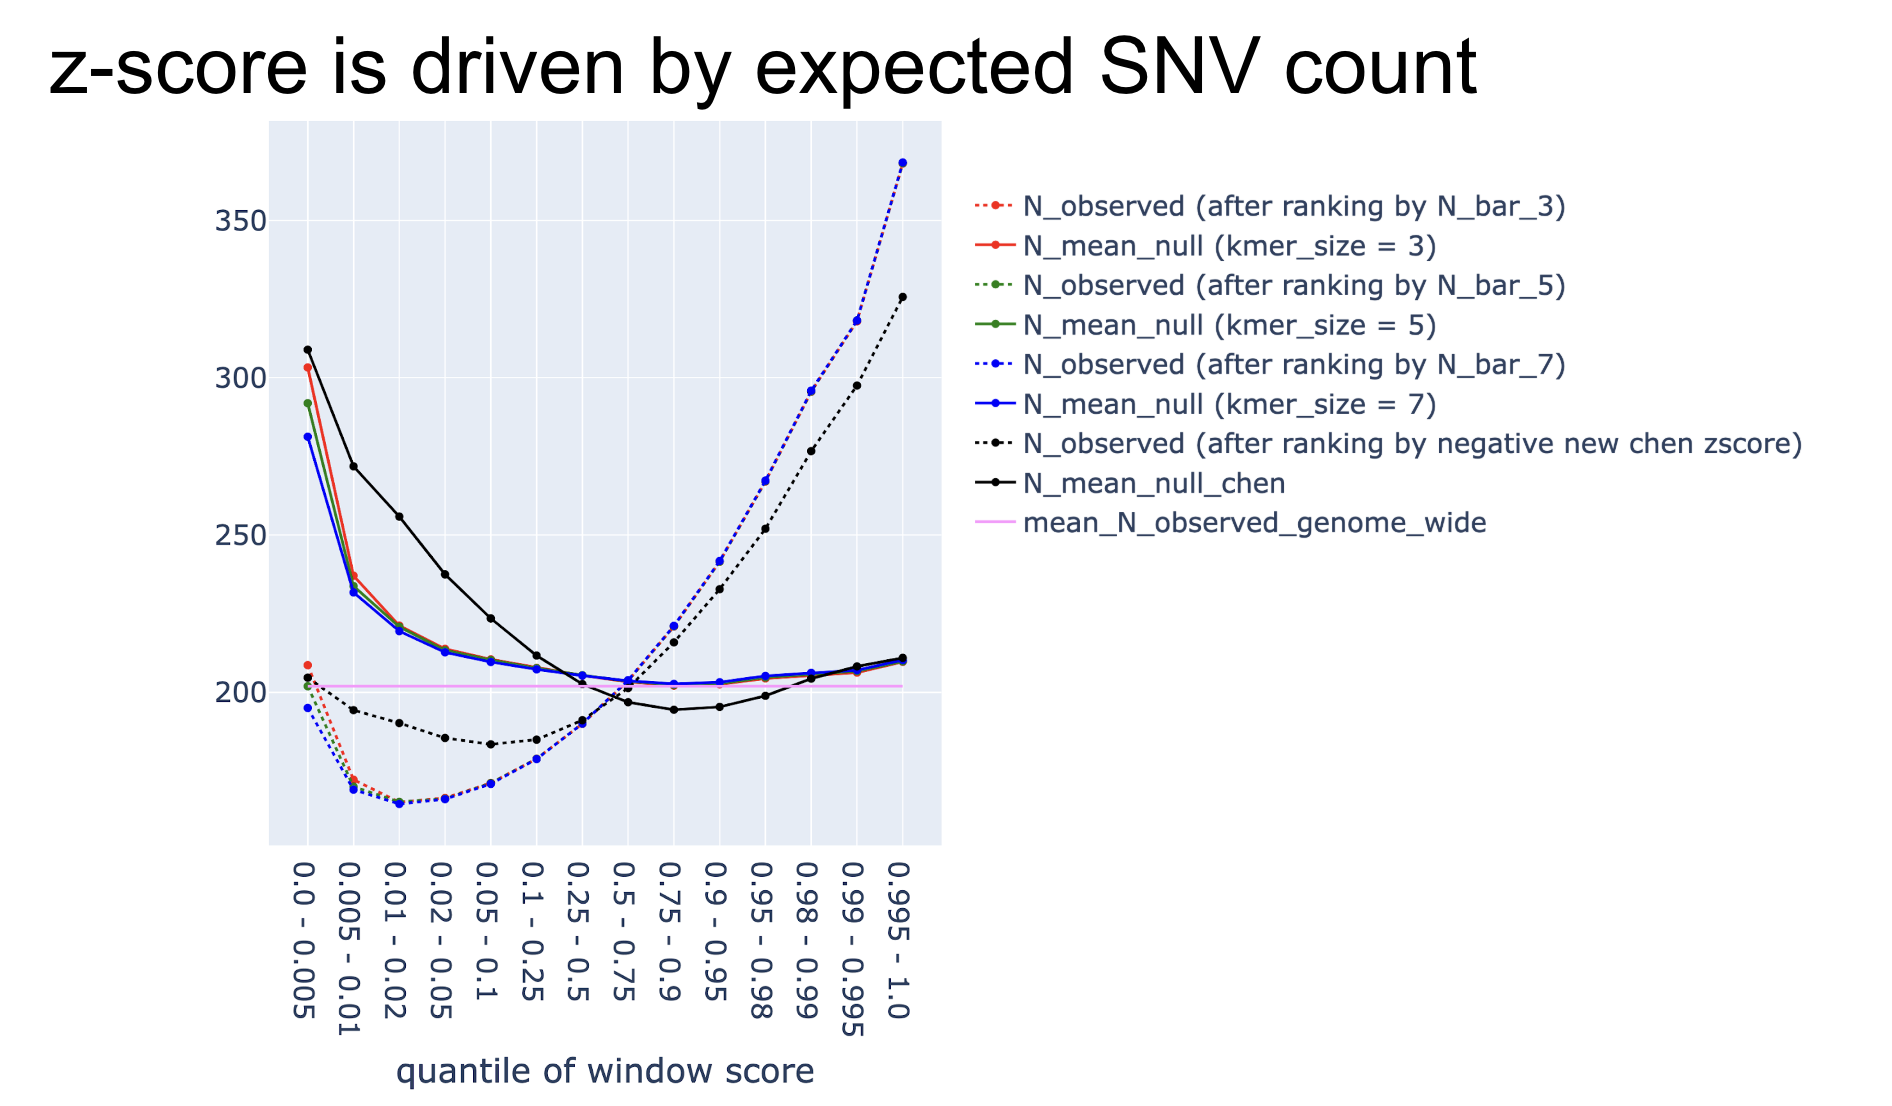

In [12]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)